In [1]:
import numpy as np
np.__version__

'1.21.4'

In [2]:
import pandas as pd
pd.__version__

'1.3.4'

In [3]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [4]:
import matplotlib.pyplot as plt

In [5]:
from matplotlib.colors import LogNorm

In [6]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [7]:
import scipy
scipy.__version__

'1.7.2'

In [8]:
from scipy import stats

In [9]:
import seaborn as sns
sns.__version__

'0.11.2'

In [10]:
from datetime import datetime

In [11]:
import sklearn
sklearn.__version__

'0.24.2'

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
default_max_columns=pd.get_option('display.max_columns')

In [14]:
default_max_rows=pd.get_option('display.max_rows')

In [15]:
default_precision=pd.get_option('display.precision')

In [16]:
pd.set_option('display.precision', 2)

In [17]:
#default_threshold=np.get_printoptions()['threshold']

In [18]:
#np.set_printoptions(threshold=10000000)

In [19]:
df=pd.read_csv('merged.csv.gz')
df.set_index(['item'],inplace=True)
df.head()

,SFHH005aa,SFHH005ab,SFHH005ac,SFHH005ad,SFHH005ae,SFHH005af,SFHH005ag,SFHH005ah,SFHH005ai,SFHH005aj,...,SFHH006q,SFHH006r,SFHH006s,SFHH006t,SFHH006u,SFHH006v,SFHH006w,SFHH006x,SFHH006y,SFHH006z
item,,,,,,,,,,,,,,,,,,,,,
AC_000001.1,21,1,1,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
AC_000192.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC_000852.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC_000939.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC_001330.1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [20]:
df=df.iloc[:,df.columns.str.contains('SFHH005')]
df.head()

,SFHH005aa,SFHH005ab,SFHH005ac,SFHH005ad,SFHH005ae,SFHH005af,SFHH005ag,SFHH005ah,SFHH005ai,SFHH005aj,...,SFHH005q,SFHH005r,SFHH005s,SFHH005t,SFHH005u,SFHH005v,SFHH005w,SFHH005x,SFHH005y,SFHH005z
item,,,,,,,,,,,,,,,,,,,,,
AC_000001.1,21,1,1,2,0,0,0,1,0,0,...,8,0,7,1,0,1,0,0,0,0
AC_000192.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC_000852.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
NC_000939.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC_001330.1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
df.tail()

,SFHH005aa,SFHH005ab,SFHH005ac,SFHH005ad,SFHH005ae,SFHH005af,SFHH005ag,SFHH005ah,SFHH005ai,SFHH005aj,...,SFHH005q,SFHH005r,SFHH005s,SFHH005t,SFHH005u,SFHH005v,SFHH005w,SFHH005x,SFHH005y,SFHH005z
item,,,,,,,,,,,,,,,,,,,,,
NC_055911.1,13,19,7,2,13,11,8,20,38,2,...,9,15,1,8,110,25,11,2,4,13
NC_055913.1,10,14,11,10,24,6,11,15,16,2,...,9,7,1,7,19,6,3,6,4,0
NC_055915.1,0,2,0,0,0,26,0,0,0,0,...,0,0,0,3,1,6,0,0,0,0
NC_055920.1,0,0,0,0,0,0,0,0,0,0,...,9,0,0,1,0,0,0,0,0,0
NC_055921.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#df.reset_index(inplace=True)
#df.rename({'index':'item'},axis='columns',inplace=True)
#df

In [23]:
#network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
#    light=.9, dark=.1, reverse=True,
#    start=1, rot=-2)

#network_lut = dict(zip(diagnoses.unique(), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
#network_labels = diagnoses

#network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)         

In [24]:
df

,SFHH005aa,SFHH005ab,SFHH005ac,SFHH005ad,SFHH005ae,SFHH005af,SFHH005ag,SFHH005ah,SFHH005ai,SFHH005aj,...,SFHH005q,SFHH005r,SFHH005s,SFHH005t,SFHH005u,SFHH005v,SFHH005w,SFHH005x,SFHH005y,SFHH005z
item,,,,,,,,,,,,,,,,,,,,,
AC_000001.1,21,1,1,2,0,0,0,1,0,0,...,8,0,7,1,0,1,0,0,0,0
AC_000192.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC_000852.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
NC_000939.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NC_001330.1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NC_055911.1,13,19,7,2,13,11,8,20,38,2,...,9,15,1,8,110,25,11,2,4,13
NC_055913.1,10,14,11,10,24,6,11,15,16,2,...,9,7,1,7,19,6,3,6,4,0
NC_055915.1,0,2,0,0,0,26,0,0,0,0,...,0,0,0,3,1,6,0,0,0,0


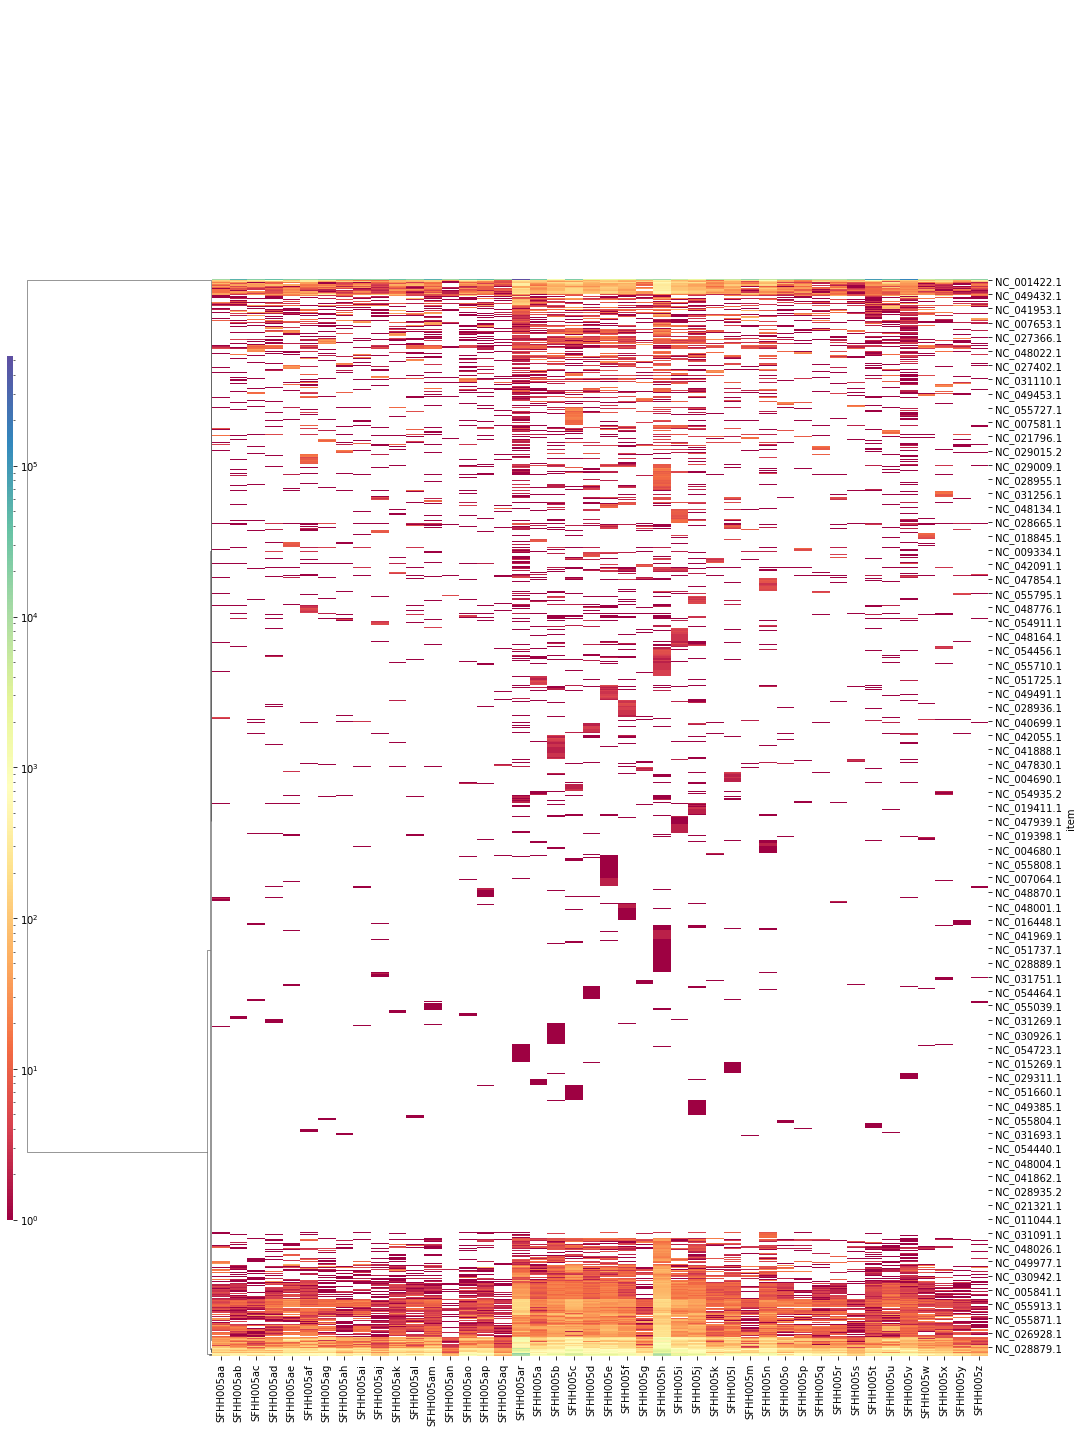

In [25]:
g=sns.clustermap(df,col_cluster=False,figsize=(15,20),cmap="Spectral",xticklabels=True,norm=LogNorm())
#,col_colors=network_colors)
#g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
#    col_colors=network_colors,xticklabels=True)


#g.fig.suptitle("Clustermap 1 : " + group_column + " : select p < " + str(heat_p) )

#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

# Draw the legend bar for the classes                 
#for label in network_labels.unique():
#    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
#    label=label, linewidth=0)

#g.ax_col_dendrogram.legend(loc="center", ncol=4)

# Adjust the postion of the main colorbar for the heatmap
#g.cax.set_position([.97, .2, .03, .45])
g.cax.set_position([0, .15, .005, .6])
plt.show()

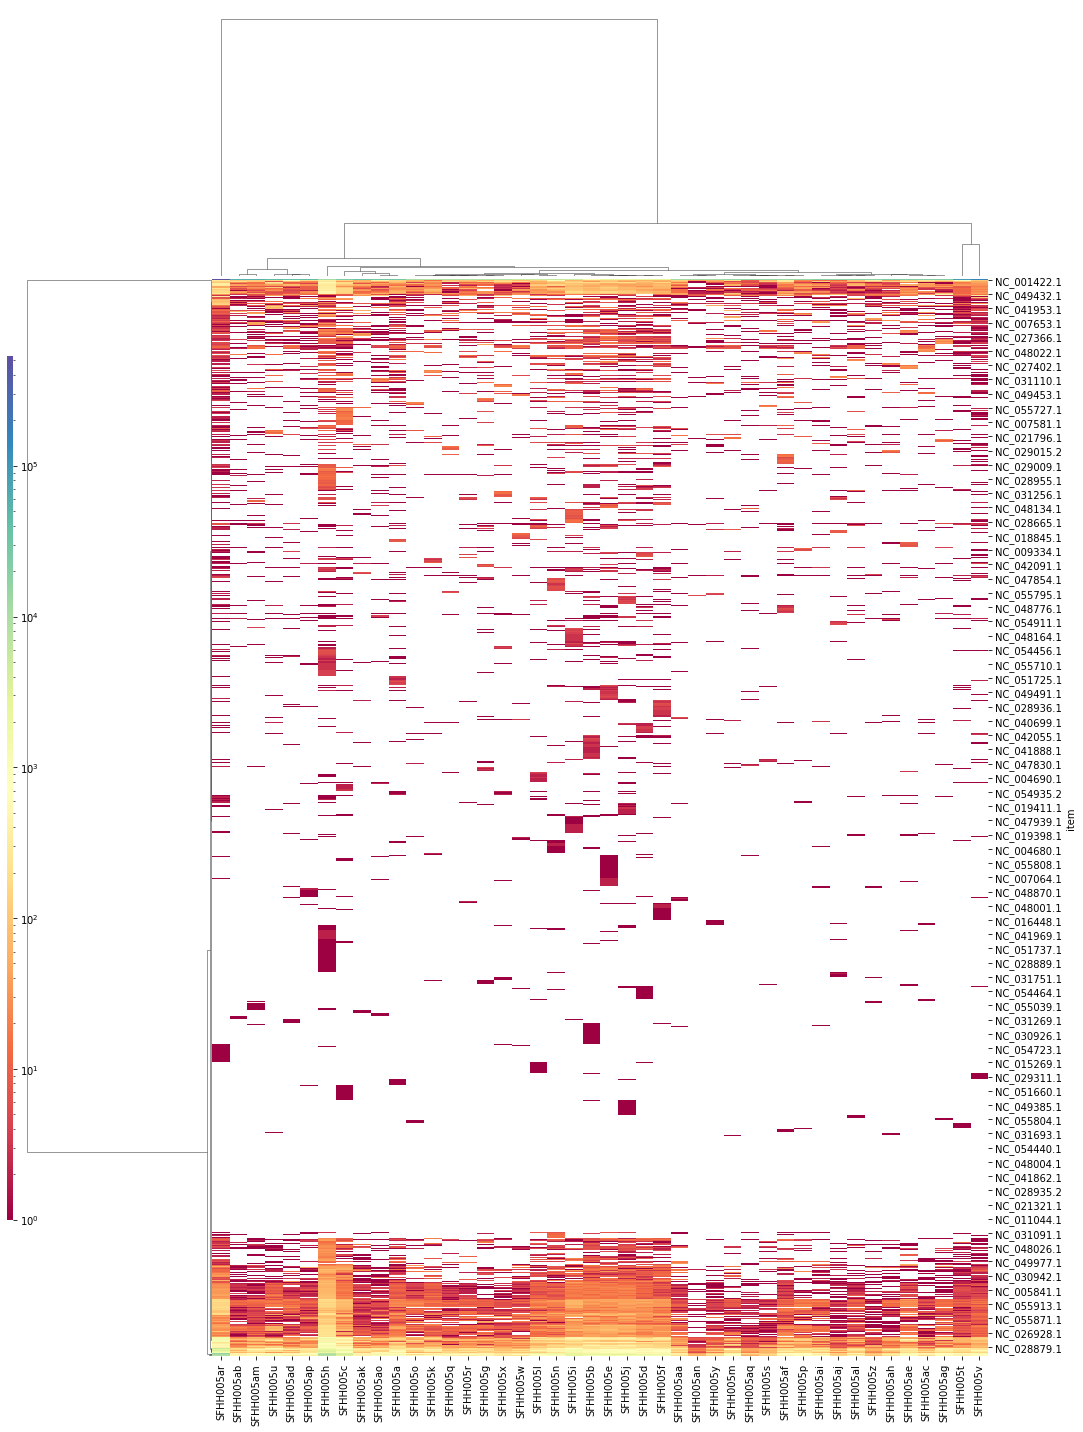

In [26]:
g=sns.clustermap(df,figsize=(15,20),cmap="Spectral",xticklabels=True,norm=LogNorm())
#g=sns.clustermap(df,figsize=(15,20),cmap="Spectral", col_colors=network_colors,xticklabels=True)

#g.fig.suptitle("Clustermap 2 : " + group_column + " : select p < " + str(heat_p) )

#plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

# Draw the legend bar for the classes                 
#for label in network_labels.unique():
#    g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
#        label=label, linewidth=0)

#g.ax_col_dendrogram.legend(loc="center", ncol=4)

# Adjust the postion of the main colorbar for the heatmap
# [dist from left,dist from bottom?,width?,height?]
g.cax.set_position([0, .15, .005, .6])
plt.show()  

In [27]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20211117 22:46:41'

In [28]:
df=df.fillna(0)

In [29]:
meta=pd.read_csv('metadata.csv')
meta.set_index(['id'],inplace=True)
#df=df.iloc[:,df.columns.str.contains('SFHH005')]
meta.head()

,disease,IDH,x1p19q
id,,,
SFHH005a,GBM,IDH1R132HWT,noncodel
SFHH005b,Oligodendroglioma,IDH-mutant,codeleted
SFHH005c,GBM,IDH-mutant,noncodel
SFHH005d,GBM,IDH-mutant,noncodel
SFHH005e,GBM,IDH1R132HWT,noncodel


In [30]:
meta=meta.iloc[meta.index.str.contains('SFHH005'),:]
meta.head()

,disease,IDH,x1p19q
id,,,
SFHH005a,GBM,IDH1R132HWT,noncodel
SFHH005b,Oligodendroglioma,IDH-mutant,codeleted
SFHH005c,GBM,IDH-mutant,noncodel
SFHH005d,GBM,IDH-mutant,noncodel
SFHH005e,GBM,IDH1R132HWT,noncodel


In [31]:
df=df.append(meta.T)
df.tail()

,SFHH005aa,SFHH005ab,SFHH005ac,SFHH005ad,SFHH005ae,SFHH005af,SFHH005ag,SFHH005ah,SFHH005ai,SFHH005aj,...,SFHH005q,SFHH005r,SFHH005s,SFHH005t,SFHH005u,SFHH005v,SFHH005w,SFHH005x,SFHH005y,SFHH005z
NC_055920.1,0,0,0,0,0,0,0,0,0,0,...,9,0,0,1,0,0,0,0,0,0
NC_055921.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
disease,GBM,DiffuseAstrocytoma,Oligodendroglioma,DiffuseAstrocytoma,DiffuseAstrocytoma,GBM,NaN,Oligodendroglioma,GBM,GBM,...,GBM,GBM,Oligodendroglioma,Oligodendroglioma,GBM,NaN,GBM,Oligodendroglioma,DiffuseAstrocytoma,GBM
IDH,IDH-mutant,IDH-mutant,IDH-mutant,IDH-mutant,IDH-mutant,IDH-mutant,NaN,IDH-mutant,IDH1R132HWT,IDH-mutant,...,IDH-mutant,IDH-mutant,IDH-mutant,IDH-mutant,IDH1R132HWT,NaN,IDH-mutant,IDH-mutant,IDH-mutant,IDH-mutant
x1p19q,noncodel,noncodel,codeleted,noncodel,noncodel,noncodel,NaN,codeleted,noncodel,noncodel,...,noncodel,noncodel,codeleted,codeleted,noncodel,NaN,noncodel,codeleted,noncodel,noncodel


In [32]:
df=df.T.reset_index().rename({'index':'subject'},axis='columns').set_index(['subject','disease','IDH','x1p19q'])
df=df.copy()
df.head()

,,,,AC_000001.1,AC_000192.1,NC_000852.5,NC_000939.2,NC_001330.1,NC_001335.1,NC_001348.1,NC_001367.1,NC_001416.1,NC_001420.2,...,NC_055902.1,NC_055907.1,NC_055908.1,NC_055909.1,NC_055910.1,NC_055911.1,NC_055913.1,NC_055915.1,NC_055920.1,NC_055921.1
subject,disease,IDH,x1p19q,,,,,,,,,,,,,,,,,,,,,
SFHH005aa,GBM,IDH-mutant,noncodel,21,0,0,0,1,0,0,0,2,4,...,0,0,0,0,0,13,10,0,0,0
SFHH005ab,DiffuseAstrocytoma,IDH-mutant,noncodel,1,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,19,14,2,0,0
SFHH005ac,Oligodendroglioma,IDH-mutant,codeleted,1,0,0,0,0,0,0,0,10,0,...,0,0,0,0,0,7,11,0,0,0
SFHH005ad,DiffuseAstrocytoma,IDH-mutant,noncodel,2,0,0,0,1,0,0,0,11,7,...,0,0,0,0,0,2,10,0,0,0
SFHH005ae,DiffuseAstrocytoma,IDH-mutant,noncodel,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,13,24,0,0,0


In [33]:
columns=df.columns
columns

Index(['AC_000001.1', 'AC_000192.1', 'NC_000852.5', 'NC_000939.2',
       'NC_001330.1', 'NC_001335.1', 'NC_001348.1', 'NC_001367.1',
       'NC_001416.1', 'NC_001420.2',
       ...
       'NC_055902.1', 'NC_055907.1', 'NC_055908.1', 'NC_055909.1',
       'NC_055910.1', 'NC_055911.1', 'NC_055913.1', 'NC_055915.1',
       'NC_055920.1', 'NC_055921.1'],
      dtype='object', length=1438)

In [34]:
df.reset_index(inplace=True)
df.head()

,subject,disease,IDH,x1p19q,AC_000001.1,AC_000192.1,NC_000852.5,NC_000939.2,NC_001330.1,NC_001335.1,...,NC_055902.1,NC_055907.1,NC_055908.1,NC_055909.1,NC_055910.1,NC_055911.1,NC_055913.1,NC_055915.1,NC_055920.1,NC_055921.1
0,SFHH005aa,GBM,IDH-mutant,noncodel,21,0,0,0,1,0,...,0,0,0,0,0,13,10,0,0,0
1,SFHH005ab,DiffuseAstrocytoma,IDH-mutant,noncodel,1,0,0,0,0,0,...,0,0,0,0,0,19,14,2,0,0
2,SFHH005ac,Oligodendroglioma,IDH-mutant,codeleted,1,0,0,0,0,0,...,0,0,0,0,0,7,11,0,0,0
3,SFHH005ad,DiffuseAstrocytoma,IDH-mutant,noncodel,2,0,0,0,1,0,...,0,0,0,0,0,2,10,0,0,0
4,SFHH005ae,DiffuseAstrocytoma,IDH-mutant,noncodel,0,0,0,0,0,0,...,0,0,0,0,0,13,24,0,0,0


In [35]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
#    localdf.reset_index(inplace=True)
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            #print(localdf[localdf[group_column]==group][col])
            #print(localdf[localdf[group_column]==group][col])

            for other in others:
                t,p = stats.ttest_ind(
#                t,p = stats.ttest_rel(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
#    selected=['sample',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
#        tmp.set_index(['sample',group_column],inplace=True)
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        #tmp.reset_index(inplace=True)
        tmp=tmp.reset_index()

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        network_pal
        network_lut = dict(zip(diagnoses.unique(), network_pal))

        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                


        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True,norm=LogNorm())
        g.fig.suptitle("Clustermap 1 : " + group_column + " : select p < " + str(heat_p) )
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True,norm=LogNorm())
        g.fig.suptitle("Clustermap 2 : " + group_column + " : select p < " + str(heat_p) )
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        pcadf.set_index(['subject',group_column],inplace=True)
        
        elements=pcadf.columns
        
        #pcadf.reset_index(inplace=True)
        pcadf=pcadf.reset_index()
        
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column + " : select p < " + str(heat_p) , fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

disease
T-Testing
Boxplotting
 p : 0.004164161401613935  ( t : 3.2796489996607274 ) :  NC_007823.1


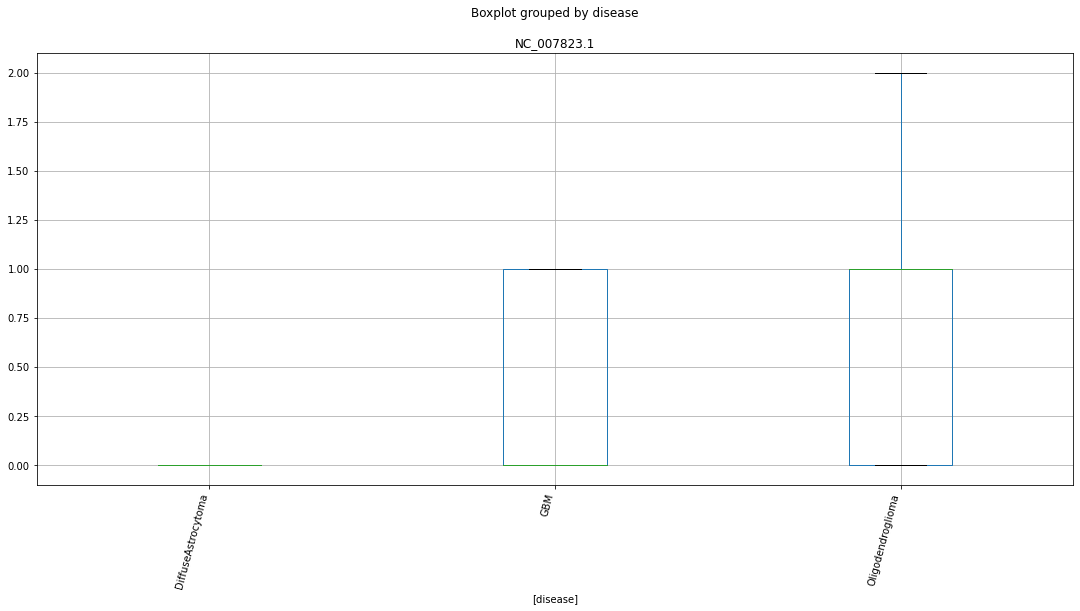

Clustermapping
['NC_007346.1' 'NC_007823.1' 'NC_009333.1' 'NC_011345.1' 'NC_021246.1'
 'NC_024697.1' 'NC_027997.1' 'NC_037667.1' 'NC_041988.1' 'NC_047846.1'
 'NC_048011.1' 'NC_048049.1' 'NC_048100.1' 'NC_048110.1' 'NC_049383.1'
 'NC_054393.1' 'NC_055747.1' 'NC_055800.1' 'NC_055838.1' 'NC_055849.1'
 'NC_055850.1' 'disease' 'subject']


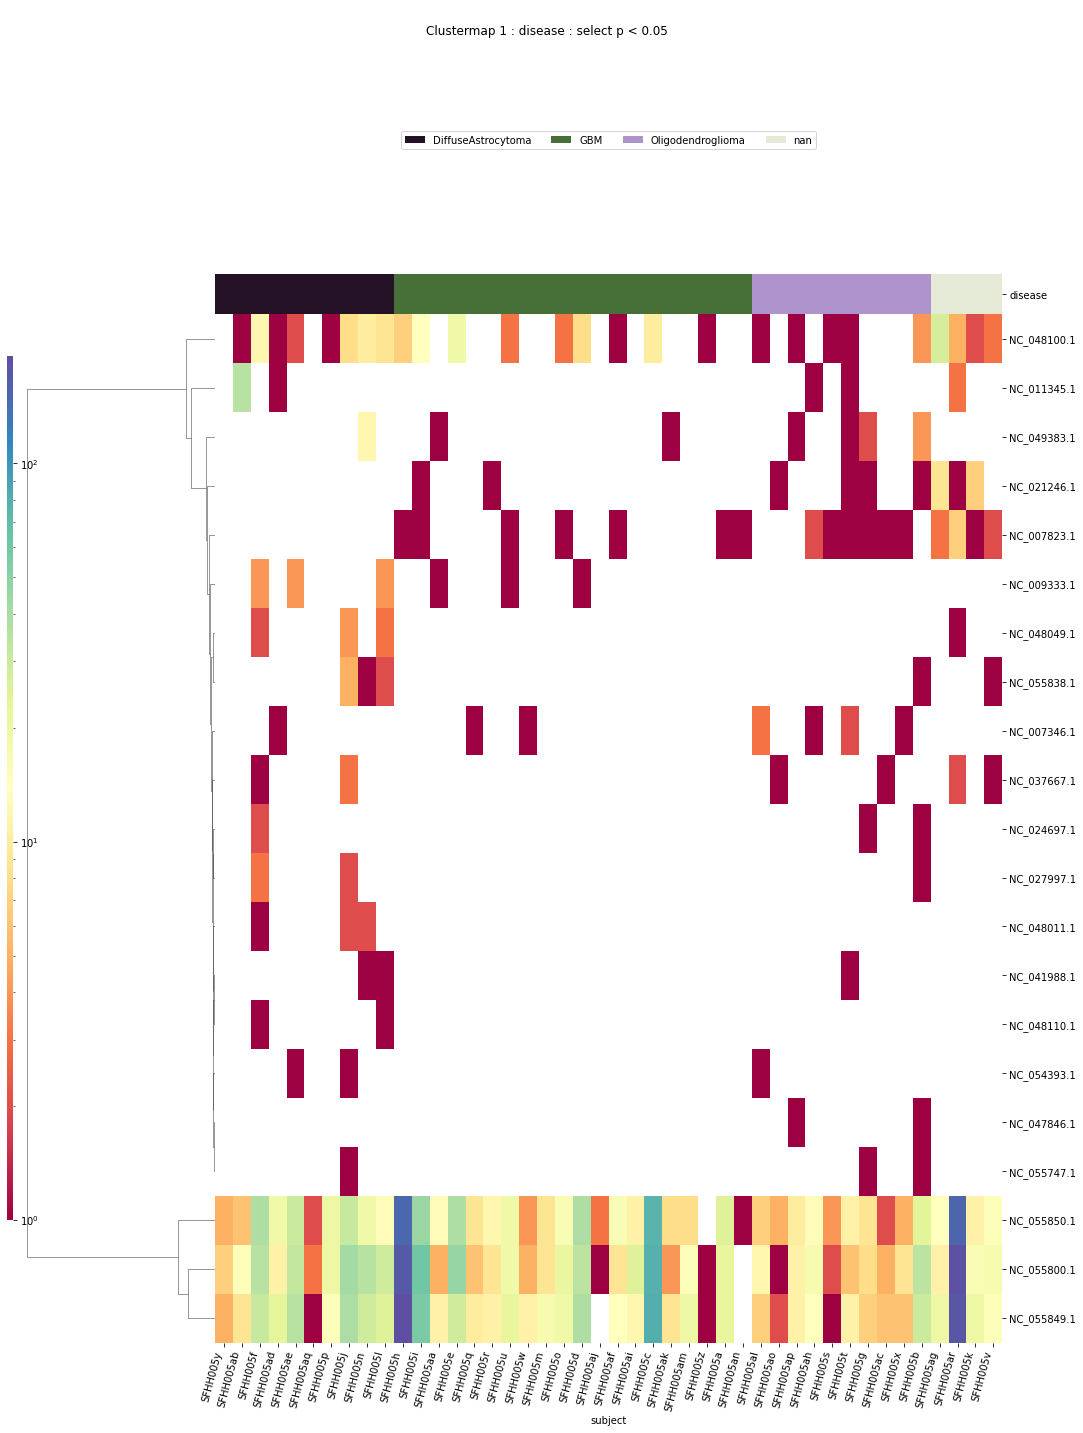

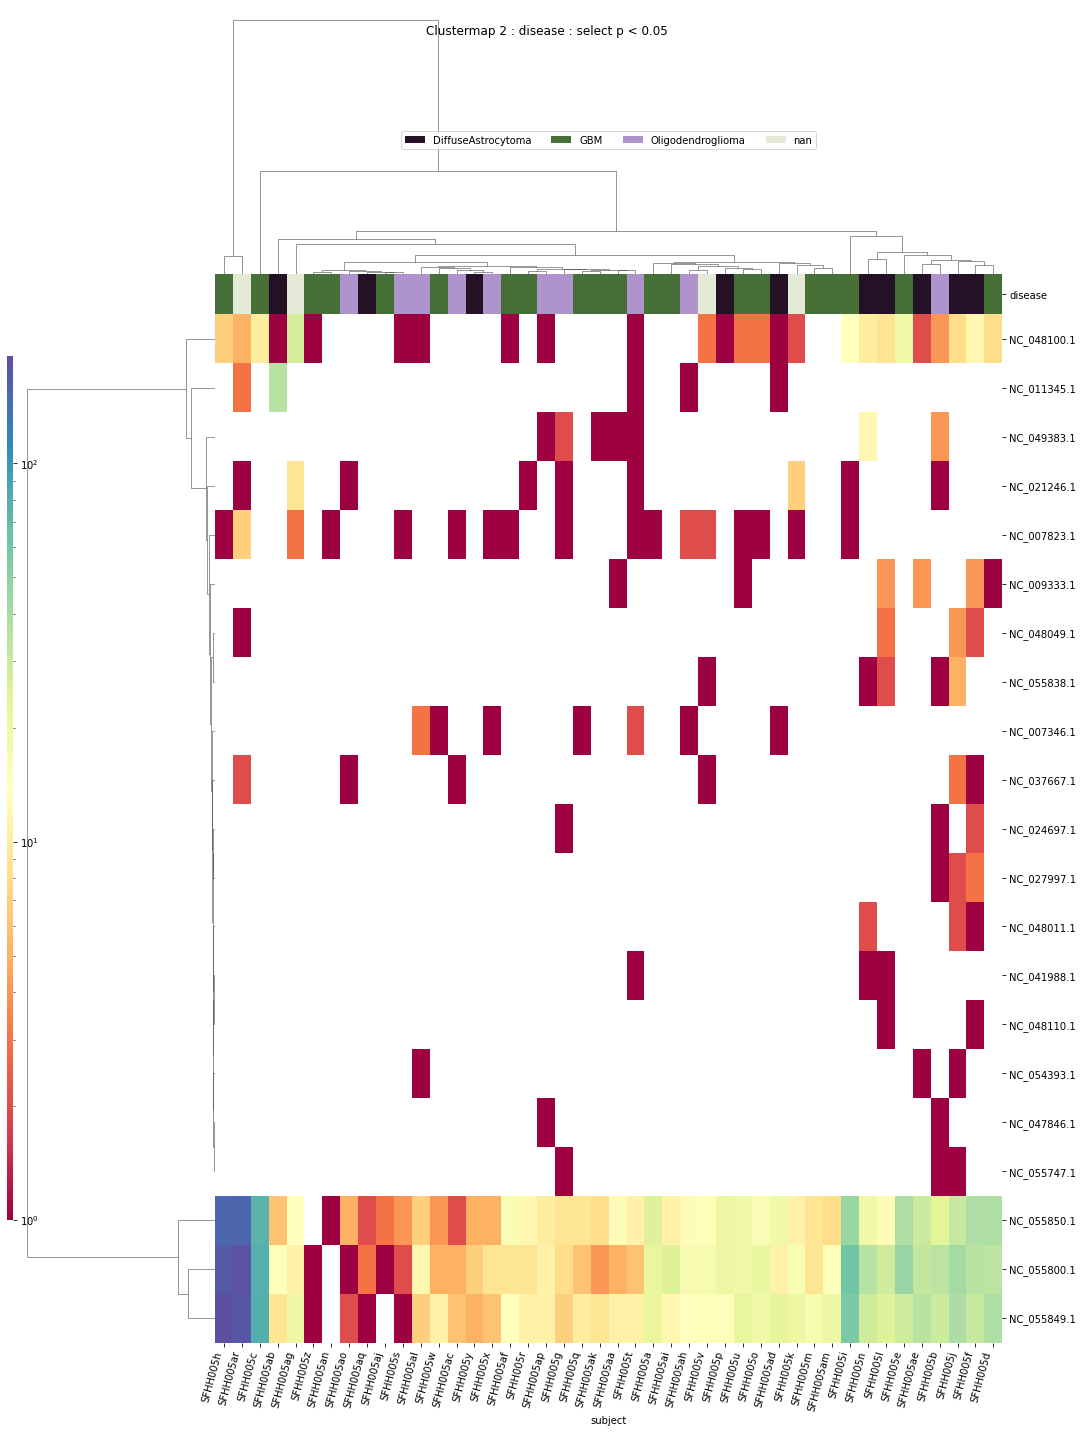

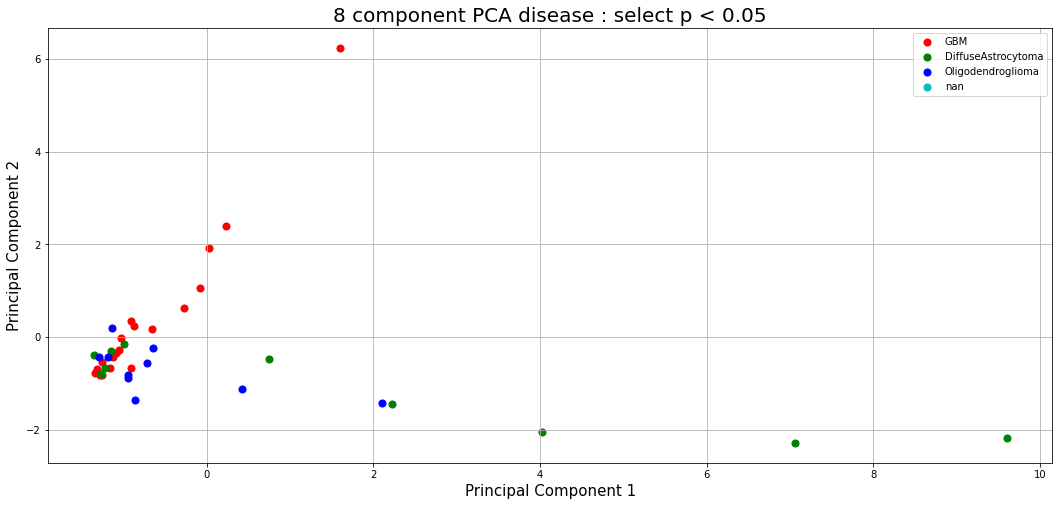

IDH
T-Testing
Boxplotting
 p : 0.0016734301436233288  ( t : 3.3831617065298727 ) :  NC_041993.1


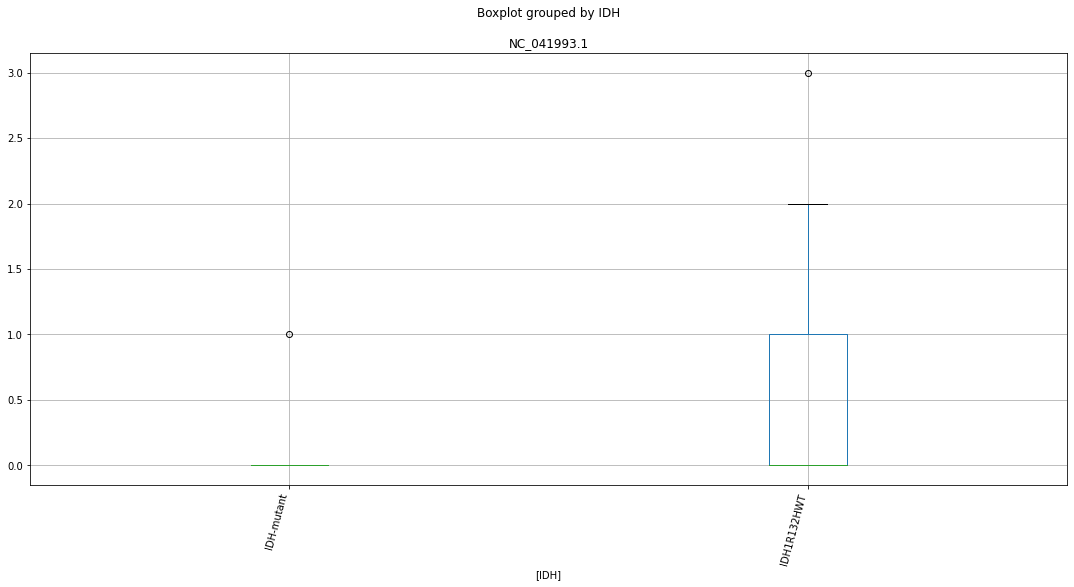

 p : 0.0026315484595721547  ( t : 3.2192602199319587 ) :  NC_041891.1


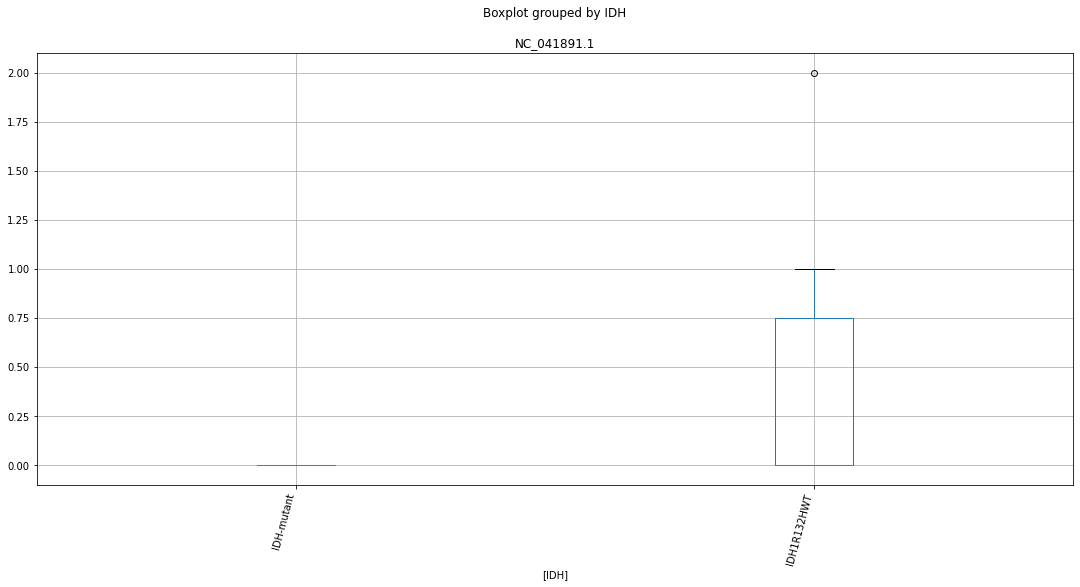

 p : 0.004415702985786751  ( t : 3.027230109754555 ) :  NC_013597.1


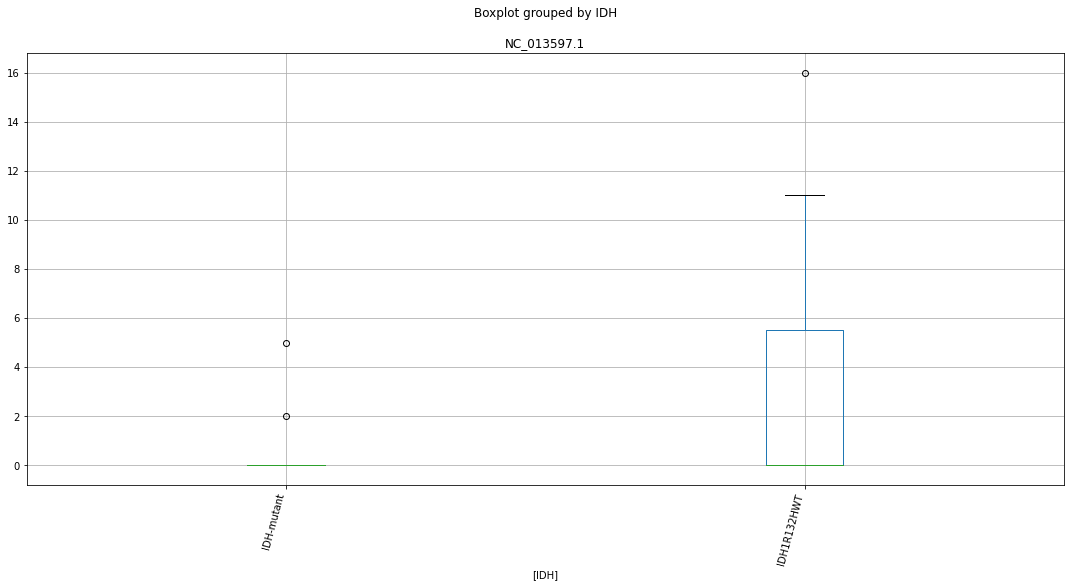

Clustermapping
['IDH' 'NC_001801.1' 'NC_004827.1' 'NC_005818.1' 'NC_007653.1'
 'NC_007967.1' 'NC_008208.1' 'NC_012743.2' 'NC_013597.1' 'NC_014636.1'
 'NC_015282.1' 'NC_018281.1' 'NC_019448.1' 'NC_020838.1' 'NC_020865.1'
 'NC_020874.1' 'NC_021061.1' 'NC_021302.1' 'NC_021348.1' 'NC_026607.2'
 'NC_028773.1' 'NC_028986.1' 'NC_029033.1' 'NC_029065.1' 'NC_031264.1'
 'NC_033169.1' 'NC_041881.1' 'NC_041891.1' 'NC_041895.1' 'NC_041993.1'
 'NC_042044.1' 'NC_047930.1' 'NC_047958.1' 'NC_048799.1' 'NC_050152.1'
 'NC_051646.1' 'NC_054716.1' 'NC_054922.1' 'NC_055364.1' 'NC_055737.1'
 'NC_055911.1' 'subject']


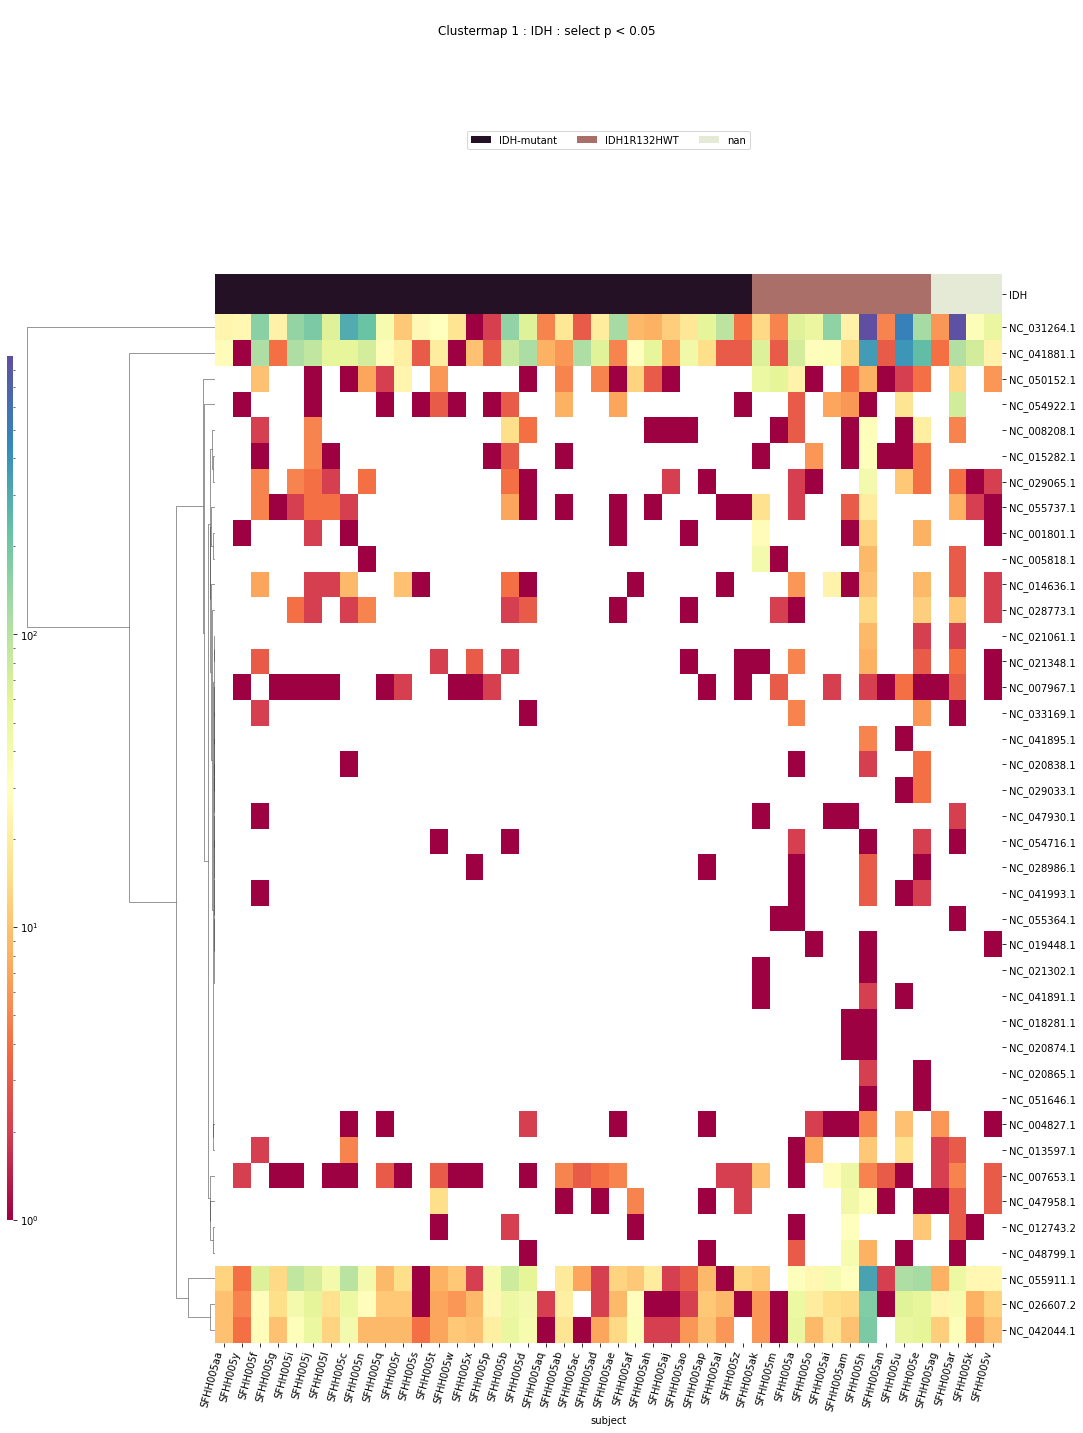

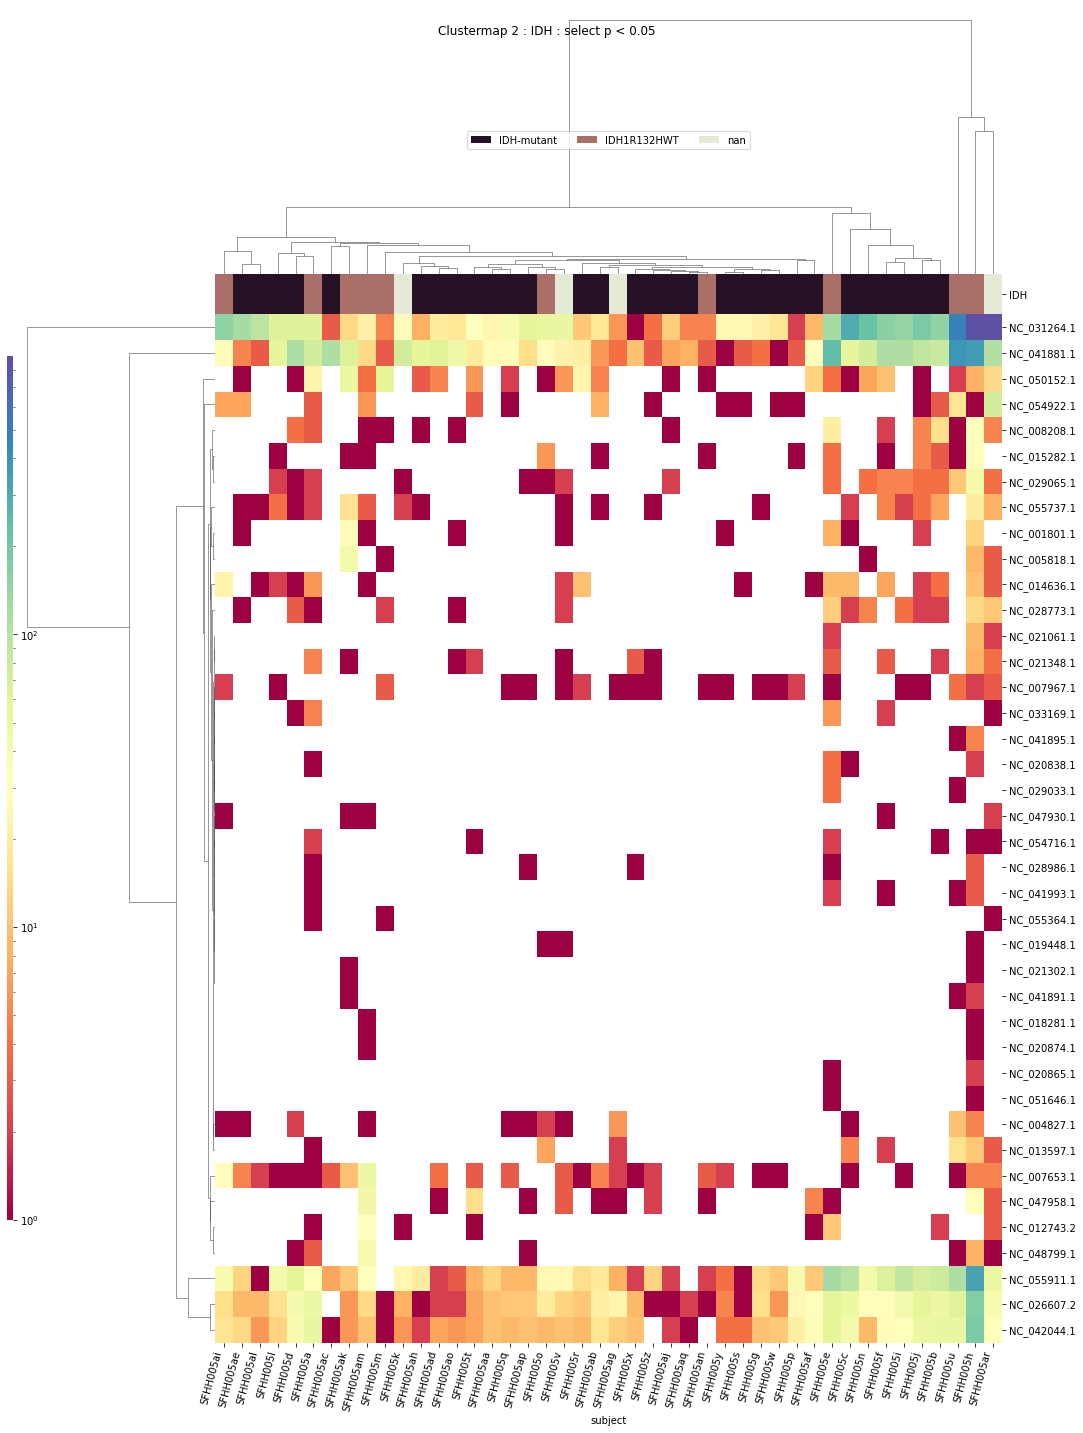

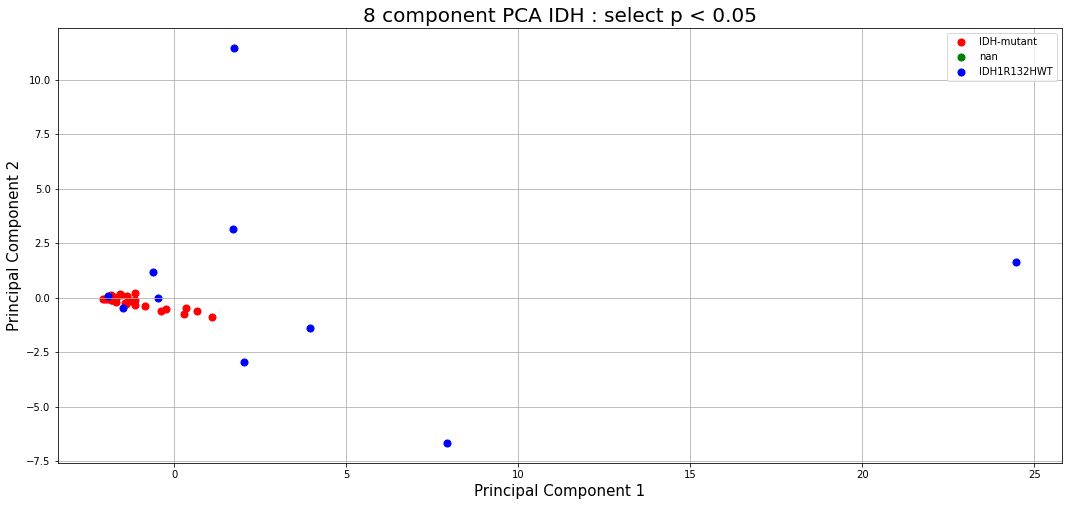

x1p19q
T-Testing
Boxplotting
Clustermapping
['NC_007346.1' 'NC_007823.1' 'NC_021246.1' 'NC_033778.1' 'NC_033829.1'
 'NC_047753.1' 'NC_047846.1' 'NC_049453.1' 'NC_055561.1' 'subject'
 'x1p19q']


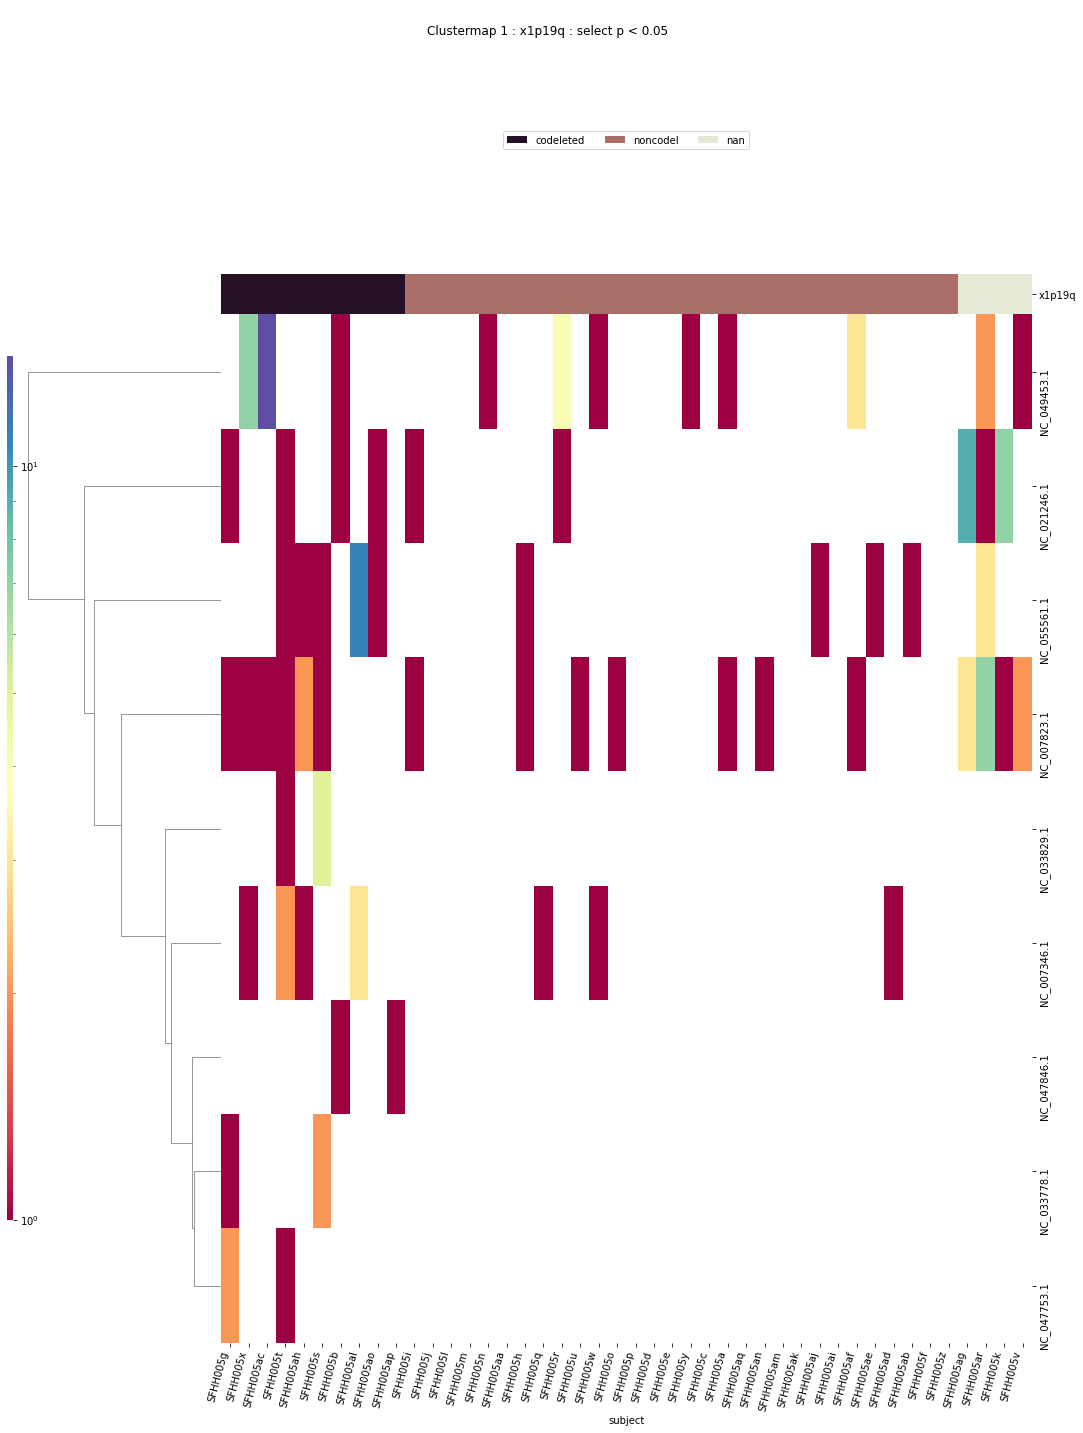

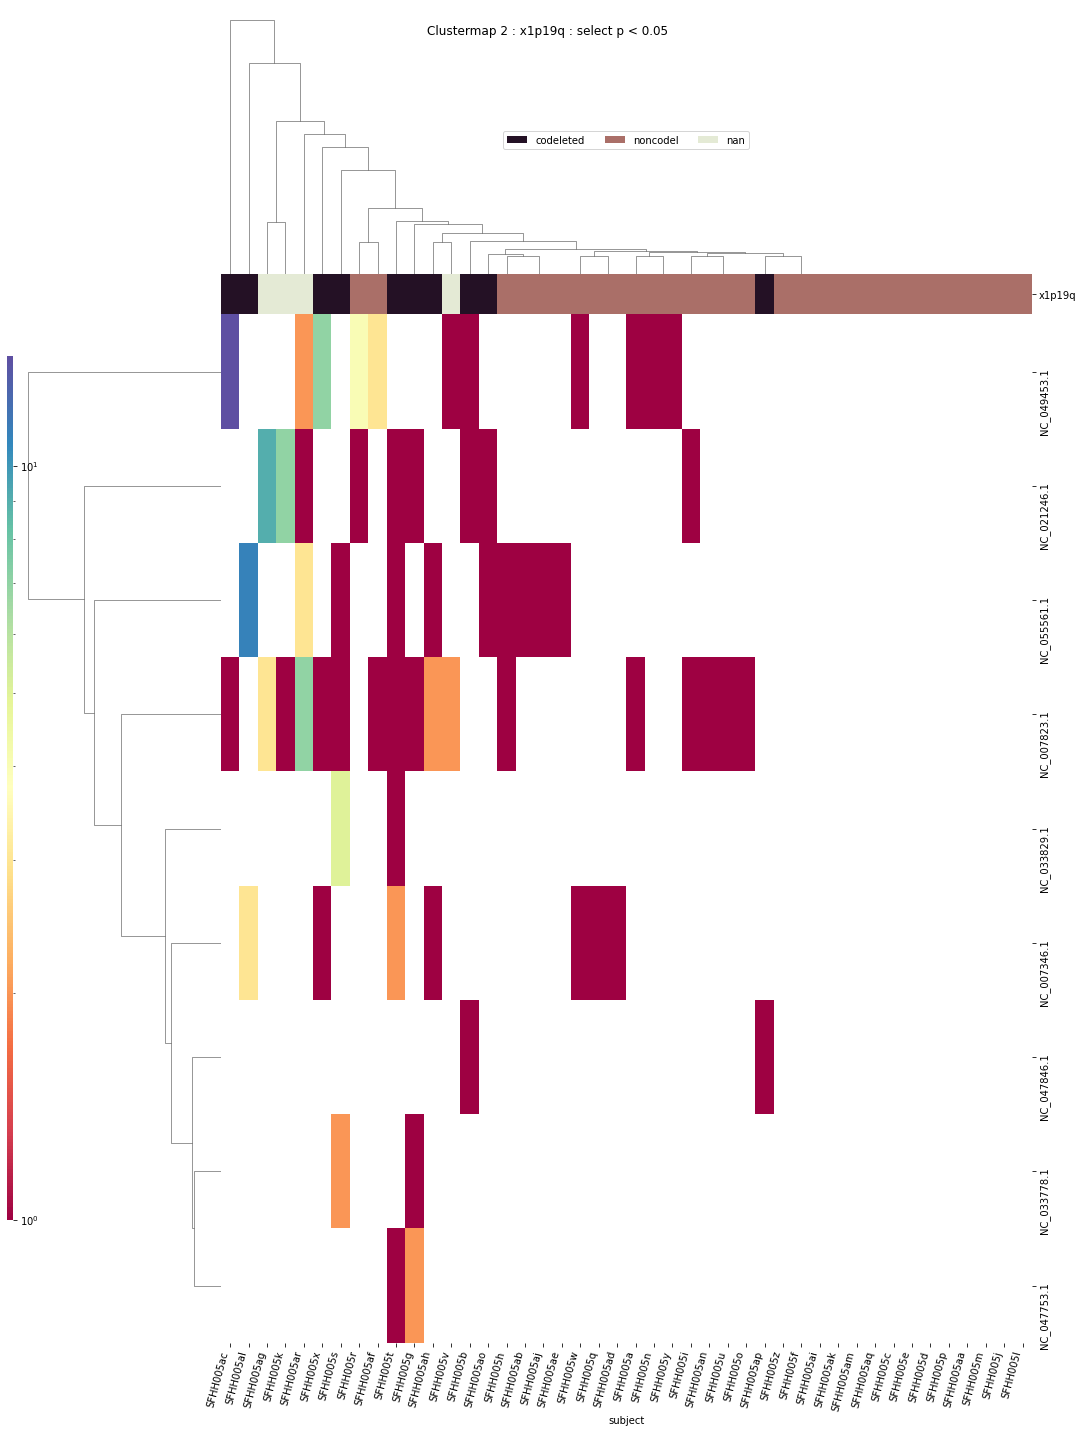

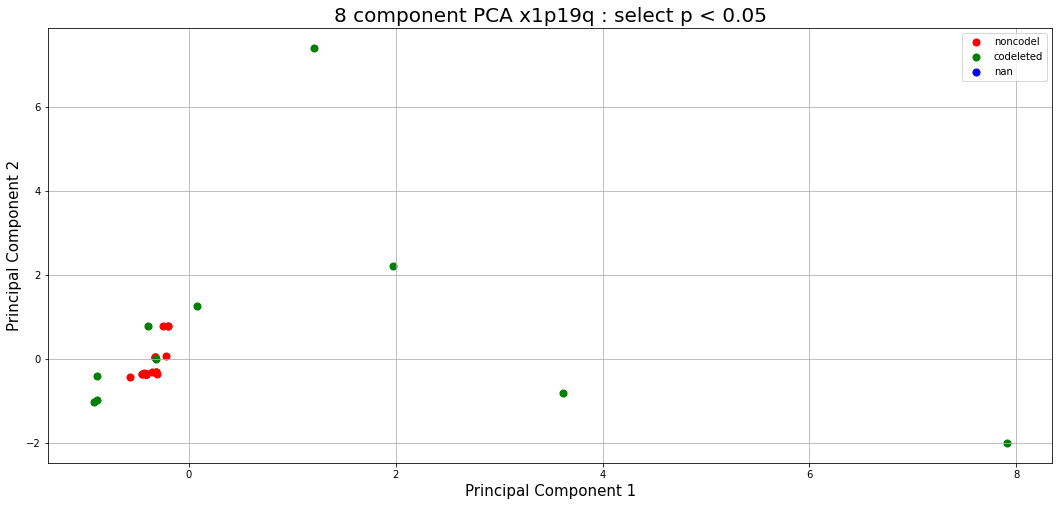

In [36]:
for column in ['disease','IDH','x1p19q']:
    print(column)
    ttests_boxplots_and_heatmaps(df,columns,column,box_p=0.005,heat_p=0.05)    

In [37]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20211117 22:47:14'

---

In [38]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [39]:
pd.set_option('display.max_columns', default_max_columns)

In [40]:
pd.set_option('display.max_rows',default_max_rows)

In [41]:
pd.set_option('display.precision', default_precision)